In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 读取数据
data = pd.read_csv('data.csv',header=[0],index_col=0)

In [3]:
#  获取数据转为np.array格式
X = data.iloc[:,0:14].to_numpy()
y = data.iloc[:,-1].to_numpy()
X.astype(np.float16)
y.astype(np.float16)

array([2.71, 2.84, 3.2 , 3.6 , 3.1 , 3.88, 4.  , 3.45, 4.16, 4.29, 4.43,
       4.66, 4.82, 5.02, 6.1 , 6.32, 7.34, 7.02, 6.88, 7.1 , 5.21, 5.43,
       5.6 , 5.82], dtype=float16)

In [4]:
# 数据划分
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# 生成模型

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

svm_reg = SVR()
rf_reg = RandomForestRegressor(n_estimators=100,max_features=10)

In [6]:
# 创建接收数组
mae_arr = np.zeros(8)
mse_arr = np.zeros(8)
mae_arr.astype(np.float64)
mse_arr.astype(np.float64)


C_arr = np.zeros(8)
gamma_arr = np.zeros(8)
C_arr.astype(np.float64)
gamma_arr.astype(np.float64)

array([0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
# 采用网格搜索法和交叉验证调参
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error
from math import sqrt

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1,5,10,15,20,50,100,200], 'gamma': [0.01,0.02,0.03,0.04,0.05,0.1,0.2,0.5,1., 5.,10.,]}

for cv in range(3,11):
    grid_search = GridSearchCV(svm_reg, param_grid, cv=cv)
    grid_search.fit(X,y)
    y_pred = grid_search.predict(X)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mae_arr[cv-3] = mae
    mse_arr[cv-3] = mse
    best_params = grid_search.best_params_
    C_arr[cv-3] = best_params['C']
    gamma_arr[cv-3] = best_params['gamma']

In [8]:
print(gamma_arr)
print(C_arr)

[0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01]
[5. 5. 5. 5. 5. 5. 5. 5.]


In [9]:
from sklearn.model_selection import cross_val_predict
mae1_arr = np.zeros(8)
mse1_arr = np.zeros(8)
mae1_arr.astype(np.float64)
mse1_arr.astype(np.float64)
svm1_reg = SVR(C=5,gamma=0.01)

import time

start_time = time.time()


for cv in range(3,11):
    y_pred = cross_val_predict(svm1_reg,X,y,cv=cv)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mae1_arr[cv-3]=mae
    mse1_arr[cv-3]=mse
    
    
end_time = time.time()

runtime = end_time - start_time
print("模型运行时间：", runtime, "秒")

模型运行时间： 0.044795989990234375 秒


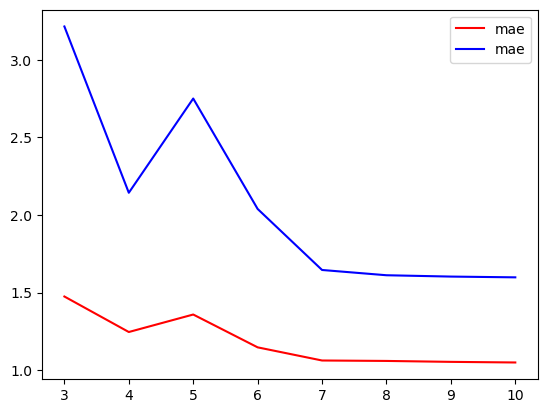

In [10]:
import matplotlib.pyplot as plt
x_data = [0, 1, 2, 3, 4, 5, 6, 7]
new_x_data = [x + 3 for x in x_data] 
plt.plot(new_x_data,mae1_arr,'r-',label='mae')
plt.plot(new_x_data,mse1_arr,'b-',label='mae')
plt.legend()

In [11]:
mae2_arr = np.zeros(8)
mse2_arr = np.zeros(8)
mae2_arr.astype(np.float64)
mse2_arr.astype(np.float64)

import time

start_time = time.time()


for cv in range(3,11):
    y_pred = cross_val_predict(rf_reg,X,y,cv=cv)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mae2_arr[cv-3]=mae
    mse2_arr[cv-3]=mse
    
    
end_time = time.time()

runtime = end_time - start_time
print("模型运行时间：", runtime, "秒")

模型运行时间： 4.165527105331421 秒


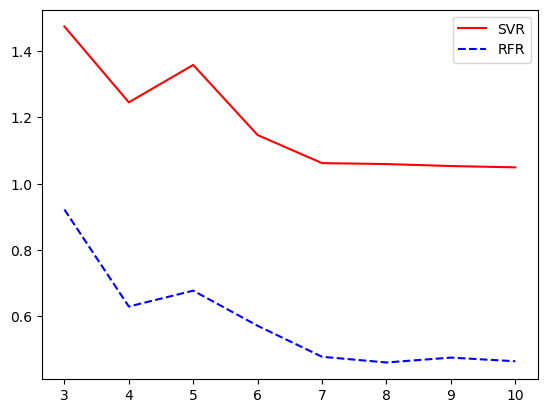

[1.4745842  1.24573436 1.3584742  1.14689636 1.06212205 1.05931529
 1.05332521 1.04936472]
[0.92208333 0.6292875  0.67711667 0.57110833 0.47759167 0.46037917
 0.47508333 0.46405417]


In [12]:
x_data = [0, 1, 2, 3, 4, 5, 6, 7]
new_x_data = [x + 3 for x in x_data] 
plt.plot(new_x_data,mae1_arr,'r-',label='SVR')
plt.plot(new_x_data,mae2_arr,'b--',label='RFR')
plt.legend()
plt.show()
print(mae1_arr)
print(mae2_arr)

[3.21510847 2.14327291 2.75063089 2.03899668 1.64555807 1.61163876
 1.60304015 1.59812511]
[1.31220349 0.60070421 0.79738885 0.5559047  0.39635763 0.37967308
 0.35786423 0.34983936]


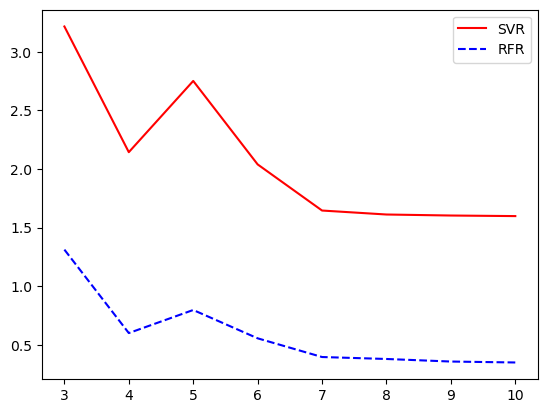

In [13]:
plt.plot(new_x_data,mse1_arr,'r-',label='SVR')
plt.plot(new_x_data,mse2_arr,'b--',label='RFR')
print(mse1_arr)
print(mse2_arr)
plt.legend()
plt.show()

In [14]:
rf_reg = RandomForestRegressor(n_estimators=100,max_features=10)
rf_reg.fit(X,y)
feature_importances = rf_reg.feature_importances_  # 获取特征重要性

# 打印每个特征的重要程度
for i, importance in enumerate(feature_importances):
    print(f"Feature {i+1}: {importance}")

Feature 1: 0.1268788052711676
Feature 2: 0.6799947973291183
Feature 3: 0.004237176053856972
Feature 4: 0.0025851483578258317
Feature 5: 0.008472006543928613
Feature 6: 0.0008761128215072687
Feature 7: 0.005577981434210958
Feature 8: 0.0048969176126559925
Feature 9: 0.005599979585320606
Feature 10: 0.02066838341339341
Feature 11: 0.03086360400789877
Feature 12: 0.0
Feature 13: 0.006720789883301015
Feature 14: 0.10262829768581466


In [15]:
# 行索引
feature_name = ['煤层瓦斯含量','煤厚','埋深','倾角','采煤高度','每日进度','工作面长度','采出率','邻近层瓦斯含量','邻近层厚度','邻近层间距','顶板管理方式','开采强度等级','层间岩性等级']

dic = {
    '特征名称': feature_name,
    '特征重要度': feature_importances
}
dic

{'特征名称': ['煤层瓦斯含量',
  '煤厚',
  '埋深',
  '倾角',
  '采煤高度',
  '每日进度',
  '工作面长度',
  '采出率',
  '邻近层瓦斯含量',
  '邻近层厚度',
  '邻近层间距',
  '顶板管理方式',
  '开采强度等级',
  '层间岩性等级'],
 '特征重要度': array([0.12687881, 0.6799948 , 0.00423718, 0.00258515, 0.00847201,
        0.00087611, 0.00557798, 0.00489692, 0.00559998, 0.02066838,
        0.0308636 , 0.        , 0.00672079, 0.1026283 ])}

In [16]:
df = pd.DataFrame(data=dic)
df

,特征名称,特征重要度
0,煤层瓦斯含量,0.126879
1,煤厚,0.679995
2,埋深,0.004237
3,倾角,0.002585
4,采煤高度,0.008472
5,每日进度,0.000876
6,工作面长度,0.005578
7,采出率,0.004897
8,邻近层瓦斯含量,0.005600
9,邻近层厚度,0.020668


In [17]:
# 对DataFrame进行排序，并输出结果
df_sorted = df.sort_values(by='特征重要度', ascending=False)
print(df_sorted)

       特征名称     特征重要度
1        煤厚  0.679995
0    煤层瓦斯含量  0.126879
13   层间岩性等级  0.102628
10    邻近层间距  0.030864
9     邻近层厚度  0.020668
4      采煤高度  0.008472
12   开采强度等级  0.006721
8   邻近层瓦斯含量  0.005600
6     工作面长度  0.005578
7       采出率  0.004897
2        埋深  0.004237
3        倾角  0.002585
5      每日进度  0.000876
11   顶板管理方式  0.000000


In [18]:
# 获取前8位的索引值
top = df.nlargest(8, '特征重要度').sort_index().index
top.to_numpy()

array([ 0,  1,  4,  8,  9, 10, 12, 13], dtype=int64)

In [19]:
# 特征筛选前8位
data = pd.read_csv('data.csv',header=[0],index_col=0)
X_new = data.iloc[:,top]
X_new.to_numpy()
y = data.iloc[:,-1].to_numpy()
X_new.astype(np.float16)
y.astype(np.float16)

array([2.71, 2.84, 3.2 , 3.6 , 3.1 , 3.88, 4.  , 3.45, 4.16, 4.29, 4.43,
       4.66, 4.82, 5.02, 6.1 , 6.32, 7.34, 7.02, 6.88, 7.1 , 5.21, 5.43,
       5.6 , 5.82], dtype=float16)

In [20]:
from sklearn.model_selection import cross_val_predict
mae3_arr = np.zeros(8)
mse3_arr = np.zeros(8)
mae3_arr.astype(np.float64)
mse3_arr.astype(np.float64)
svm3_reg = SVR(C=5,gamma=0.01)

import time

start_time = time.time()


for cv in range(3,11):
    y_pred = cross_val_predict(svm3_reg,X_new,y,cv=cv)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mae3_arr[cv-3]=mae
    mse3_arr[cv-3]=mse
    
    
end_time = time.time()

runtime = end_time - start_time
print("模型运行时间：", runtime, "秒")

模型运行时间： 0.12105274200439453 秒


In [21]:
mae4_arr = np.zeros(8)
mse4_arr = np.zeros(8)
mae4_arr.astype(np.float64)
mse4_arr.astype(np.float64)

import time

start_time = time.time()


for cv in range(3,11):
    y_pred = cross_val_predict(rf_reg,X_new,y,cv=cv)
    mae = mean_absolute_error(y, y_pred)
    mse = mean_squared_error(y, y_pred)
    mae4_arr[cv-3]=mae
    mse4_arr[cv-3]=mse
    
    
end_time = time.time()

runtime = end_time - start_time
print("模型运行时间：", runtime, "秒")

模型运行时间： 4.159961700439453 秒


[3.00036134 1.44852385 2.41120197 1.7565872  1.10507094 1.13122568
 1.12917474 1.12950255]
[1.03538974 0.39354224 0.63204918 0.41580132 0.20897272 0.19461129
 0.19089374 0.20854946]


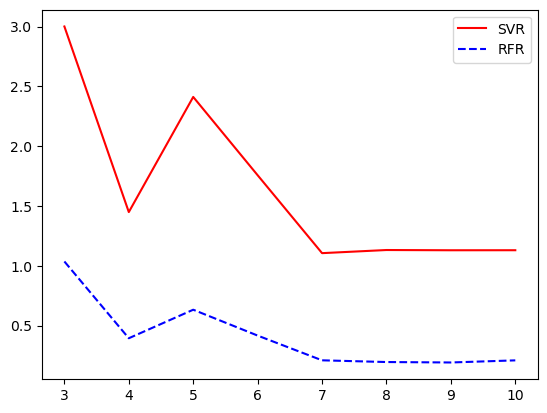

In [22]:
plt.plot(new_x_data,mse3_arr,'r-',label='SVR')
plt.plot(new_x_data,mse4_arr,'b--',label='RFR')
print(mse3_arr)
print(mse4_arr)
plt.legend()
plt.show()

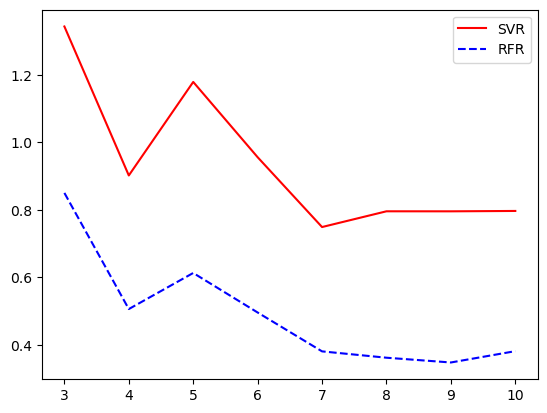

[1.34287596 0.90153989 1.17859435 0.95556646 0.74872637 0.7953725
 0.79528467 0.79638781]
[0.84980417 0.50576667 0.61265    0.49554583 0.38039167 0.36160833
 0.34750417 0.3810375 ]


In [23]:
x_data = [0, 1, 2, 3, 4, 5, 6, 7]
new_x_data = [x + 3 for x in x_data] 
plt.plot(new_x_data,mae3_arr,'r-',label='SVR')
plt.plot(new_x_data,mae4_arr,'b--',label='RFR')
plt.legend()
plt.show()
print(mae3_arr)
print(mae4_arr)

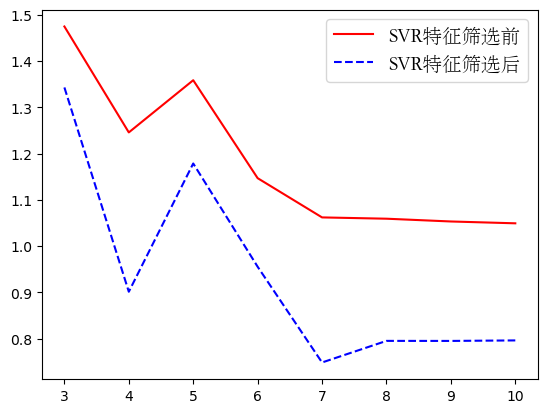

In [24]:
from matplotlib.font_manager import FontProperties
font = FontProperties(fname='STSONG.TTF', size=14)
plt.plot(new_x_data,mae1_arr,'r-',label='SVR特征筛选前')
plt.plot(new_x_data,mae3_arr,'b--',label='SVR特征筛选后')
plt.legend(prop=font)
plt.show()

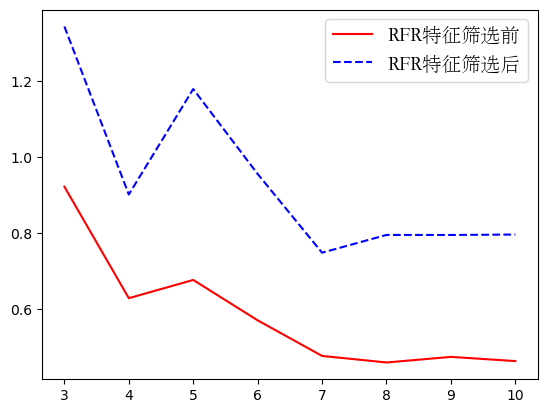

In [25]:
font = FontProperties(fname='STSONG.TTF', size=14)
plt.plot(new_x_data,mae2_arr,'r-',label='RFR特征筛选前')
plt.plot(new_x_data,mae3_arr,'b--',label='RFR特征筛选后')
plt.legend(prop=font)
plt.show()